# TRANSFORMACIÓN Y PRE PROCESAMIENTO DE DATOS

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np
from scipy import stats



print(os.listdir("/Users/geraldine/Documents/IDS/DATASET/datatwo"))

['.DS_Store', 'new_data_test.csv', 'new_data_train.csv']


In [4]:
train=pd.read_csv("/Users/geraldine/Documents/IDS//DATASET/datatwo/new_data_train.csv", index_col = 0)
train.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,0,tcp,private,S0,0,0,0,0,0,0,...,4,0.02,0.1,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [5]:
test=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/datatwo/new_data_test.csv", index_col = 0)
test.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,0,tcp,private,S0,0,0,0,0,0,0,...,11,0.04,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
4,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


Se quiere saber si hay o no hay ataque, vamos hacer una transfornacion de otucome para que nos permita reduciarlo a categoria y a algo mas puntual de forma númerica, es decir, 1 y 0 que permita saber si hay o no ataque.

In [6]:
# Categorizamos los tipos de ataque en la categoría correspondiente

two_attacks=["back.", "land.","neptune.","pod.","smurf.","teardrop."]
r2l_attacks=["ftp_write.","guess_passwd.","imap.","multihop.","phf.","spy.","warezclient.","warezmaster."]
u2r_attacks=["buffer_overflow.","loadmodule.","perl.","rootkit."]
probe_attacks=["ipsweep.","nmap.","portsweep.","satan."]


attack =["Normal","Dos","R2L","U2R","Probe"]
attack

['Normal', 'Dos', 'R2L', 'U2R', 'Probe']

In [7]:
# Creamos una función que nos permita categorizar los tipos de ataque
def type_attack (row):
    if row["outcome"] in two_attacks:
        return attack[1]
    if row["outcome"] in r2l_attacks:
        return attack[2]
    if row["outcome"] in u2r_attacks:
        return attack[3]
    if row["outcome"] in probe_attacks:
        return attack[4]
    return attack[0]

#COMBINANOS LOS DATASETS EN UN LABEL ATTACK 
test_samples_length = len(test)
df=pd.concat([train,test])
df["attack"]=df.apply(type_attack,axis=1)

# Eliminamos la variable outcome
df=df.drop("outcome",axis=1)

# De nuevo dividimos los datos en conjuntos de prueba y entrenamiento.
train= df.iloc[:-test_samples_length, :]
test= df.iloc[-test_samples_length:,:]

In [8]:
# Quitamos la columna index que se agregan
pd.options.display.max_columns = None
pd.options.display.max_rows = None
train.head(100)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,Dos
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,Dos
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,1.0,0.0,0.00,0.03,0.09,0.00,255,4,0.02,0.10,0.00,0.00,1.00,1.00,0.0,0.00,Dos
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,Dos
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,Dos
5,2594,udp,other,SF,146,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,1,0.00,0.85,0.99,0.00,0.00,0.00,0.0,0.00,Normal
6,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,Dos
7,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,Dos
8,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,Dos
9,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.00,1.00,0.00,0.00,255,251,0.98,0.01,0.00,0.00,0.00,0.00,0.0,0.00,Normal


/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


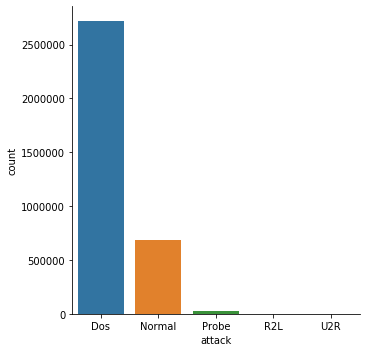

In [10]:
#Aqui podemos ver de forma visual la categoria mas usada
sb.factorplot('attack',data=train,kind="count")

Del gráfico anterior podemos observar que la categoría de ataque Dos es la más usada en tipos de ataques

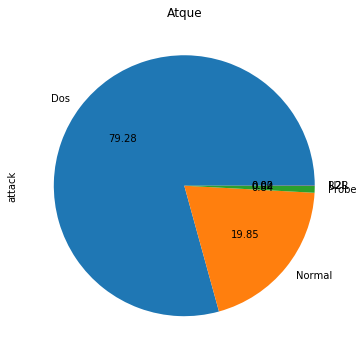

In [13]:

# Gráfico de tarta de ataques
plot = train['attack'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Atque')

Del grafico anterior podemos ver que existe un 79.28% de que se realizaron ataques de la categoría Dos, y un 19.85 de que no se realizaron ataques y fue un trafico normal, y existe un 0.2% de que se realizaron tipo de ataques U2R y Probe. Hasta el momento podemos detrminar que es muy frecuente que existan ataques de tipo Dos.

In [14]:
# Numero total de ataques
total_ataques = np.size(train['attack'])
total_ataques

3428901

In [15]:
# Tabla de contingencia 
pd.crosstab(index=train['attack'],
            columns=train['protocol_type'], margins=True)

protocol_type,icmp,tcp,udp,All
attack,,,,
Dos,1966233,751655,703,2718591
Normal,8959,537993,133735,680687
Probe,8937,18514,1344,28795
R2L,0,794,0,794
U2R,0,33,1,34
All,1984129,1308989,135783,3428901


De lo anterior vemos que hubo 2718591 cantidad de datos en usarse el ataque Dos, en donde el protocolo que mas se uso fue el de icmp, seguido de tcp. En trafico normal el protocolo mas usado es el tcp.  

In [17]:

# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=train['attack'], columns=train['protocol_type'],
            margins=True).apply(lambda r: r/len(train) *100,
                                axis=1)

protocol_type,icmp,tcp,udp,All
attack,,,,
Dos,57.342950,21.921164,0.020502,79.284616
Normal,0.261279,15.689954,3.900229,19.851463
Probe,0.260637,0.539940,0.039196,0.839773
R2L,0.000000,0.023156,0.000000,0.023156
U2R,0.000000,0.000962,0.000029,0.000992
All,57.864867,38.175176,3.959957,100.000000


De lo anterior vemos que hubo 57.342950 procentaje de datos en usarse el ataque Dos

In [18]:
# Tabla de contingencia 
pd.crosstab(index=train['attack'],
            columns=train['service'], margins=True)

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
attack,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dos,0,0,717,0,729,708,689,708,750,727,738,736,0,727,0,1966228,714,713,1277,717,1298,727,0,708,2814,715,0,712,720,747,723,735,713,713,721,729,691,734,731,743,736,724,0,748,0,721,724,710,710055,0,725,735,708,800,727,732,732,729,751,1297,0,5,732,0,0,704,755,745,744,2718591
Normal,354,86,0,0,1621,0,0,0,0,0,0,30,40426,0,2620,2454,0,0,3485,2645,26743,0,0,0,433193,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2624,39463,0,0,646,0,51666,8,0,0,3,66843,0,5,0,0,0,1531,2,5,359,96,3776,0,0,0,0,680687
Probe,1,3,9,2,8,8,3,10,20,13,15,19,9,16,8893,41,6,6,41,24,41,21,1,9,27,5,2,7,11,10,8,6,18,8,26,26,8,9,10,14,3,11,0,10500,5,6,7,7,8594,0,26,20,9,25,10,20,9,11,14,24,0,0,23,0,3,10,11,8,25,28795
R2L,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,515,0,0,0,3,0,0,10,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,0,0,0,794
U2R,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,34
All,355,89,726,2,2358,716,692,718,770,740,753,785,40435,743,11513,1968723,720,719,4803,3610,28606,748,1,717,436037,720,2,732,731,757,731,741,731,723,747,755,699,743,741,757,739,735,2624,50717,5,727,1377,717,770315,8,751,755,720,67668,737,757,741,740,765,2911,2,10,1114,96,3779,714,766,753,769,3428901


Podemos ver que el service mas usado en un ataque Dos fue ecr_i con 1966228 denegacion de servicio

In [24]:
pd.crosstab(index=train['service'], columns=train['attack'],
            margins=True).apply(lambda r: r/len(train) *100,
                                axis=1)

attack,Dos,Normal,Probe,R2L,U2R,All
service,,,,,,
IRC,0.000000,0.010324,0.000029,0.000000,0.000000,0.010353
X11,0.000000,0.002508,0.000087,0.000000,0.000000,0.002596
Z39_50,0.020910,0.000000,0.000262,0.000000,0.000000,0.021173
aol,0.000000,0.000000,0.000058,0.000000,0.000000,0.000058
auth,0.021260,0.047275,0.000233,0.000000,0.000000,0.068768
bgp,0.020648,0.000000,0.000233,0.000000,0.000000,0.020881
courier,0.020094,0.000000,0.000087,0.000000,0.000000,0.020181
csnet_ns,0.020648,0.000000,0.000292,0.000000,0.000000,0.020940
ctf,0.021873,0.000000,0.000583,0.000000,0.000000,0.022456


In [25]:
# Tabla de contingencia 
pd.crosstab(index=train['attack'],
            columns=train['flag'], margins=True)

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,All
attack,,,,,,,,,,,,
Dos,0,140027,3210,0,60,606895,2,2,0,1968395,0,2718591
Normal,12,37446,425,0,234,305,365,105,35,641759,1,680687
Probe,29,10781,62,77,5386,1329,1,2,0,10399,729,28795
R2L,0,0,28,0,4,1,1,1,3,753,3,794
U2R,0,0,0,0,0,0,0,0,0,34,0,34
All,41,188254,3725,77,5684,608530,369,110,38,2621340,733,3428901


El flag mas usado fue SF en el ataque Dos con una cantidad de 1968395 registros

In [26]:
pd.crosstab(index=train['attack'], columns=train['flag'],
            margins=True).apply(lambda r: r/len(train) *100,
                                axis=1)

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,All
attack,,,,,,,,,,,,
Dos,0.000000,4.083728,0.093616,0.000000,0.001750,17.699403,0.000058,0.000058,0.000000,57.406003,0.000000,79.284616
Normal,0.000350,1.092070,0.012395,0.000000,0.006824,0.008895,0.010645,0.003062,0.001021,18.716172,0.000029,19.851463
Probe,0.000846,0.314416,0.001808,0.002246,0.157077,0.038759,0.000029,0.000058,0.000000,0.303275,0.021260,0.839773
R2L,0.000000,0.000000,0.000817,0.000000,0.000117,0.000029,0.000029,0.000029,0.000087,0.021960,0.000087,0.023156
U2R,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000992,0.000000,0.000992
All,0.001196,5.490214,0.108635,0.002246,0.165767,17.747086,0.010761,0.003208,0.001108,76.448401,0.021377,100.000000


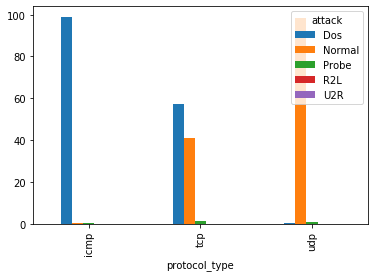

In [28]:
plot = pd.crosstab(index=train['protocol_type'],
            columns=train['attack']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

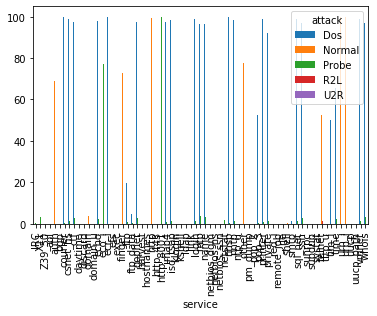

In [29]:
plot = pd.crosstab(index=train['service'],
            columns=train['attack']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

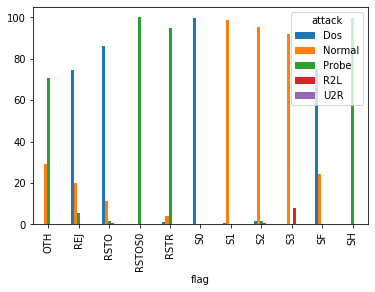

In [30]:
plot = pd.crosstab(index=train['flag'],
            columns=train['attack']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

In [31]:
train.to_csv("/Users/geraldine/Documents/IDS/DATASET/datathree/new_data_train.csv")

In [32]:
test.to_csv("/Users/geraldine/Documents/IDS/DATASET/datathree/new_data_test.csv")